In [2]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv('combined_data.csv')

In [5]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [6]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [7]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [10]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 4806      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 12,813
Trainable params: 12,813
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 1593 samples, validate on 399 samples
Epoch 1/30
1593/1593 [==============================] - 0s 63us/sample - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.9484 - val_accuracy: 0.7368
Epoch 2/30
1593/1593 [==============================] - 0s 63us/sample - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.9932 - val_accuracy: 0.7118
Epoch 3/30
1593/1593 [==============================] - 0s 65us/sample - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.9684 - val_accuracy: 0.7318
Epoch 4/30
1593/1593 [==============================] - 0s 56us/sample - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.9724 - val_accuracy: 0.7343
Epoch 5/30
1593/1593 [==============================] - 0s 68us/sample - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.9762 - val_accuracy: 0.7318
Epoch 6/30
1593/1593 [==============================] - 0s 66us/sample - loss: 0.0205 - accuracy: 0.9931 - val_loss: 1.0754 - val_accuracy: 0.7043
Epoch 7/30
1593/1593 [==============================] - 0s 56us/sample 

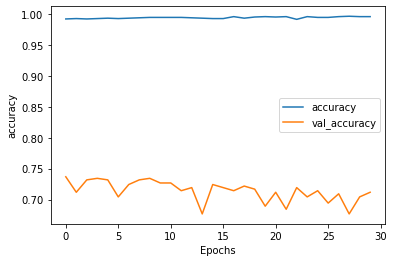

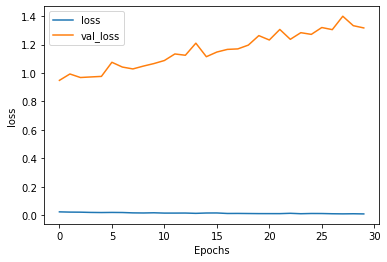

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")